# Milestone 1 - Data Visualization Complementary Views 

## Author - Nourhan El Zarif



## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g., small multiples) on both categorical and numeric variables.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
headcount_df = pd.read_csv(filename)
headcount_df.describe()

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


## Part 1: Complementary Views of Data
In this section, I will use multiple tecniques to visulize casino data.

### Scatter plot for headcount by the hour

Text(0.5, 0, 'Hour')

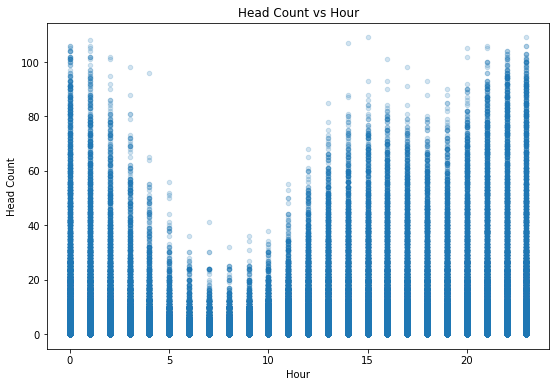

In [3]:
%matplotlib inline
ax = plt.figure(figsize=(9,6)).gca()
headcount_df.plot.scatter(x = 'Hour', y = 'HeadCount', ax = ax, alpha =0.2)
ax.set_title('Head Count vs Hour')
ax.set_ylabel('Head Count')
ax.set_xlabel('Hour')

Using a scatter plot for headcount at every hour shows us that the general trend of people's attendance pattern is most dense between 9pm-2am 

### Hexbin plot for headcount by the hour

Text(0.5, 0, 'Hour')

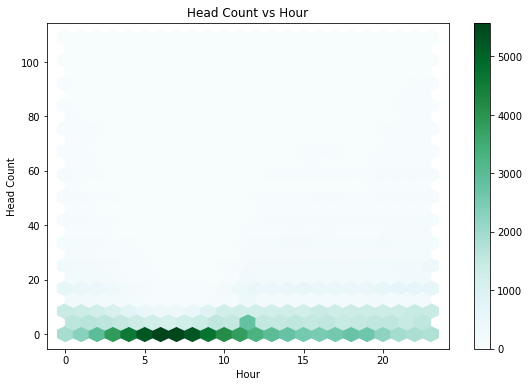

In [4]:
ax = plt.figure(figsize=(9,6)).gca()
headcount_df.plot.hexbin(x = 'Hour', y = 'HeadCount', gridsize = 23, ax = ax)
ax.set_title('Head Count vs Hour')
ax.set_ylabel('Head Count')
ax.set_xlabel('Hour')

The hexbin plot doesn't clearly show us when attendance is most dense, because headcounts for different games vary alot, but it does show us when it is least dense. 4am - 9am is when the casino has the lowest headcount.

### Texas Poker Timeseries

In [5]:
#Setting up a Texas Poker (TP) dataframe
tp_df = headcount_df.loc[headcount_df.loc[:, 'GameCode']=='TP', :]

tp_df.loc[:,'DateFormat'] = pd.to_datetime(headcount_df.loc[:, 'DateFormat'])
tp_df.set_index('DateFormat', inplace = True)
#print(tp_df.head())

C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0.5, 1.0, 'Time series of TP Headcount')

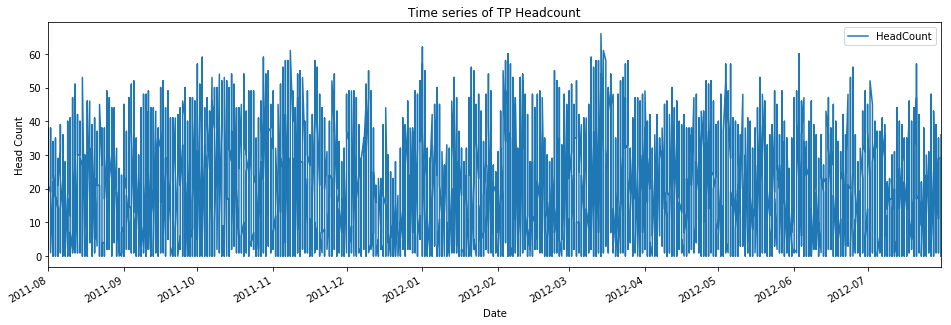

In [6]:
#plotting TP data throught the year
ax = plt.figure(figsize = (16, 5)).gca()
tp_df.plot(y = 'HeadCount', use_index=True, ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Head Count')
ax.set_title('Time series of TP Headcount')

By plotting the TP throughout the year, we can see a pattern of local peeks. I am assuming, this is the weekend peek. There is also clear annual minimum during December. 

Text(0.5, 0, 'Hour')

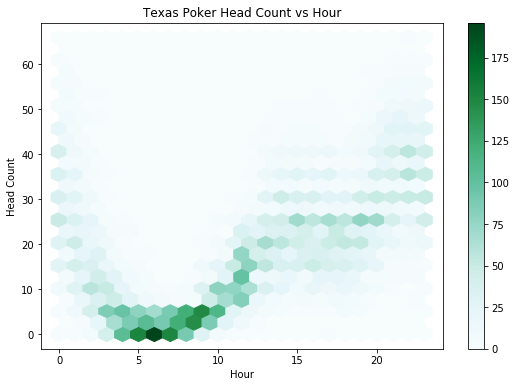

In [7]:
ax = plt.figure(figsize=(9,6)).gca()
tp_df.plot.hexbin(x = 'Hour', y = 'HeadCount', gridsize = 23, ax = ax)
ax.set_title('Texas Poker Head Count vs Hour')
ax.set_ylabel('Head Count')
ax.set_xlabel('Hour')

By plotting headcount by the hour for Texas Poker only, we can see the trend more easily. The color gradient ranges between 0-200 occurences, as opposed to the previous hexbin plot which color gradient ranges from 0-5000 occurences. 

C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0.5, 0, 'Hour')

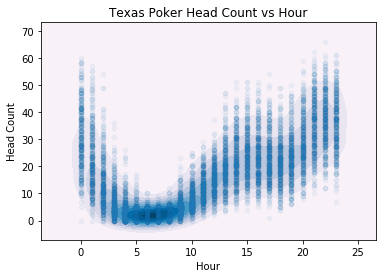

In [8]:
ax = sns.kdeplot(tp_df.loc[:, ['Hour', 'HeadCount']], shade = True, cmap = 'PuBu')
tp_df.plot.scatter(x = 'Hour', y = 'HeadCount', ax = ax, alpha=0.05)
ax.set_title('Texas Poker Head Count vs Hour')
ax.set_ylabel('Head Count')
ax.set_xlabel('Hour')

Again, we can see the headcount trend. After midnight, headcount starts to go down. It reaches the lowest around 6am and starts to rise slowly again around 10am. It reaches the highest attendance between 8pm and midnight. 

### Comparing Different Games With Multiple dimensions

Text(0.5, 1.0, 'Head Count vs Hour for different Games & Marker size for Day of the Week')

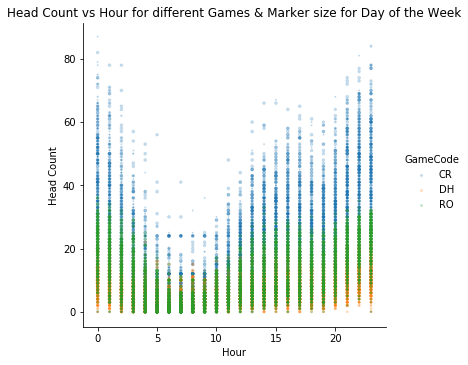

In [9]:
temp1  = headcount_df.loc[headcount_df.loc[:, 'GameCode']=='CR']
temp2 = headcount_df.loc[headcount_df.loc[:, 'GameCode']=='DH']
temp3 = headcount_df.loc[headcount_df.loc[:, 'GameCode']=='RO']
temp = pd.concat([temp1, temp2, temp3])


sns.lmplot(x = 'Hour', 
            y = 'HeadCount', 
            data = temp,
            hue = 'GameCode',
            fit_reg=False,
            scatter_kws= {'alpha': 0.2, 's': temp.loc[:, 'DayOfWeek']})



plt.xlabel('Hour')
plt.ylabel('Head Count')
plt.title('Head Count vs Hour for different Games & Marker size for Day of the Week')

This view shows us 4 dimensions: DayNumber, HeadCount, GameCode, and DayOfWeek. Having this many dimensions makes extracting data from the plot difficult. It is easy to see the relationship between headcount and time/game, but it is very difficult to differentiate marker size for day of the week due to the saturation of data points. 

## Part 2: Projecting Multiple Dimensions Using Faceting

Categorical Data: Day of the Week, Game Code
Numeric Data: Hour, HeadCount

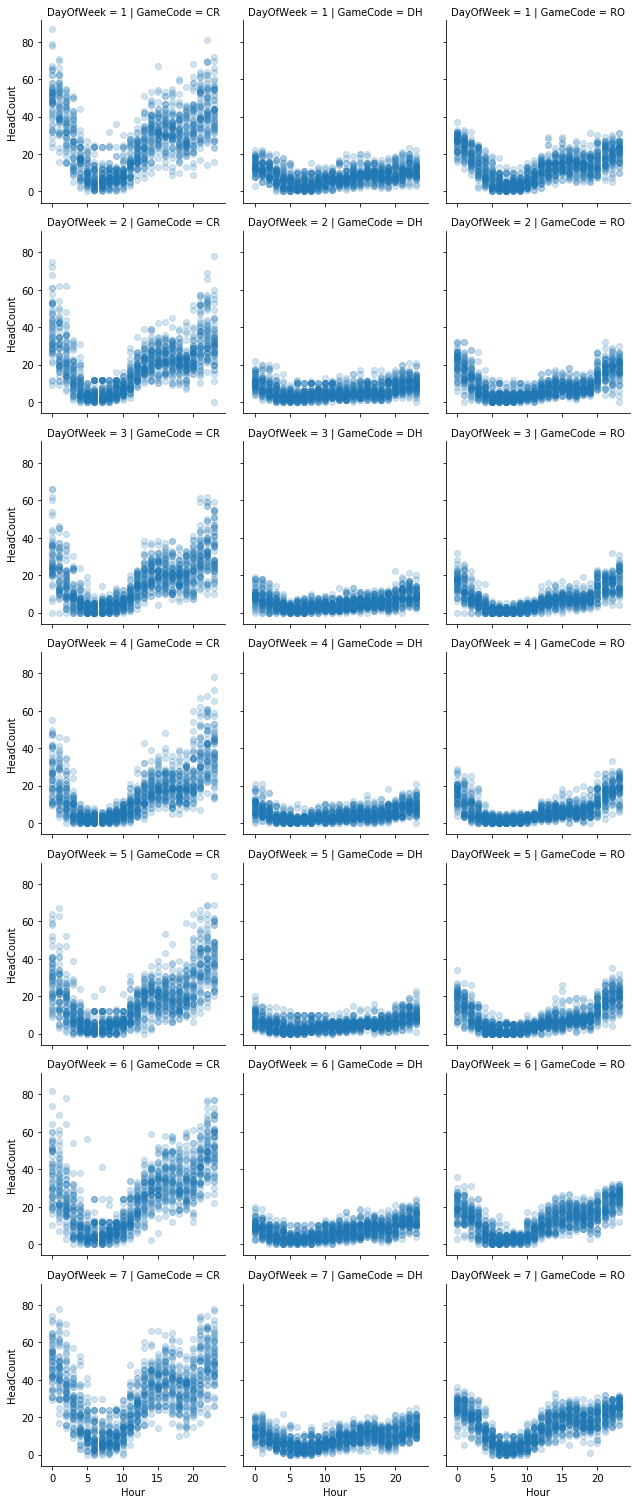

In [10]:
g = sns.FacetGrid(temp, 
                  col='GameCode', 
                  row='DayOfWeek')
g = g.map(plt.scatter, 'Hour', 'HeadCount', alpha =0.2) 

By using FacetGrid, we can make better distinction in the data. For example, if we compare the row for day 5 vs day 7, we can see that more people come to play all three games, especially in the afternoon hours. 